# Sites Shapefile


In [1]:
from snowexsql.data import SiteData
from snowexsql.db import get_db 
from snowexsql.conversions import query_to_geopandas, query_to_pandas
from geopandas import GeoDataFrame
import pandas as pd 
import geopandas as gpd


db_name = 'snow:hackweek@db.snowexdata.org/snowex'

In [9]:
engine, session = get_db(db_name)

qry = session.query(SiteData.site_id, SiteData.latitude, SiteData.longitude, SiteData.site_name).distinct()

df_snow_ex = query_to_pandas(qry, engine).drop_duplicates(subset=["site_name"])
gdf_snow_ex = gpd.GeoDataFrame(
    df_snow_ex, 
    geometry=gpd.points_from_xy(df_snow_ex.longitude, df_snow_ex.latitude),
    crs=4326
)

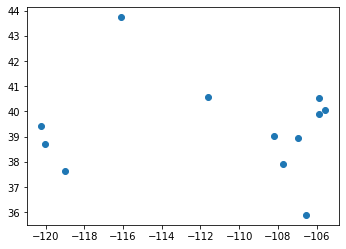

In [10]:
gdf_snow_ex.plot()

In [8]:
gdf_snow_ex.to_file('snowex_site_locations.json')  
gdf_snow_ex.to_file('snowex_site_locations.shp')  

ValueError: Invalid field type <class 'geoalchemy2.elements.WKBElement'>